<a href="https://colab.research.google.com/github/RaviTeja51/image_watermark_removal/blob/master/VGG_INFERENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
def load_image(path):
  image = tf.io.read_file(path)
  image = tf.io.decode_jpeg(image)
  image = tf.cast(image,tf.float32)
  image = tf.image.resize(image,[256,256],
                          method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  image = (image/127.5)-1
  return tf.reshape(image,(1,256,256,3))

In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
model = tf.keras.models.load_model("/content/drive/MyDrive/min_loss_gen/")

In [5]:
def generate_image(model,path,savepath):
  image = load_image(path)
  gen_image = model(image)[0]
  img = Image.open(path)
  height,width=img.size
    
  
  gen_image = gen_image*0.5 + 0.5
  gen_image = tf.image.resize(gen_image,[height,width],
                              method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  plt.subplot(1,2,1)
  plt.title("Input image")
  plt.imshow(img)
  plt.axis("off")
  plt.subplot(1,2,2)
  plt.title("Generated image")
  plt.imshow(gen_image)
  tf.keras.preprocessing.image.save_img(f'{save_path}',gen_image)
  plt.axis("off")
  plt.show()
  print(gen_image.shape[:2],img.size)




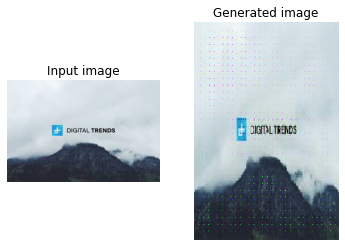

(275, 183) (275, 183)


In [10]:
save_path = "/content/test4.jpg"
path = f"/content/test4.jpeg"

generate_image(model,path,save_path)